# Supervised Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from rdkit import Chem
from rdkit.Chem import AllChem

# Classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [53]:
df = pd.read_csv('cyp3a4-clean.smi', sep='\t')
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=2048) for s in df.smiles.tolist()]

pca = PCA(n_components=1024)
crds_pca = pca.fit_transform(fps)

y_true_cls = np.array(df.status.astype('int64').tolist())

from sklearn.preprocessing import Normalizer

y_true_reg = np.array(df.pval.tolist()).reshape(-1, 1)
# transformer = Normalizer().fit(y_true_reg)
# y_true_reg = transformer.transform(y_true_reg)

## Machine learning models valudation algorithms

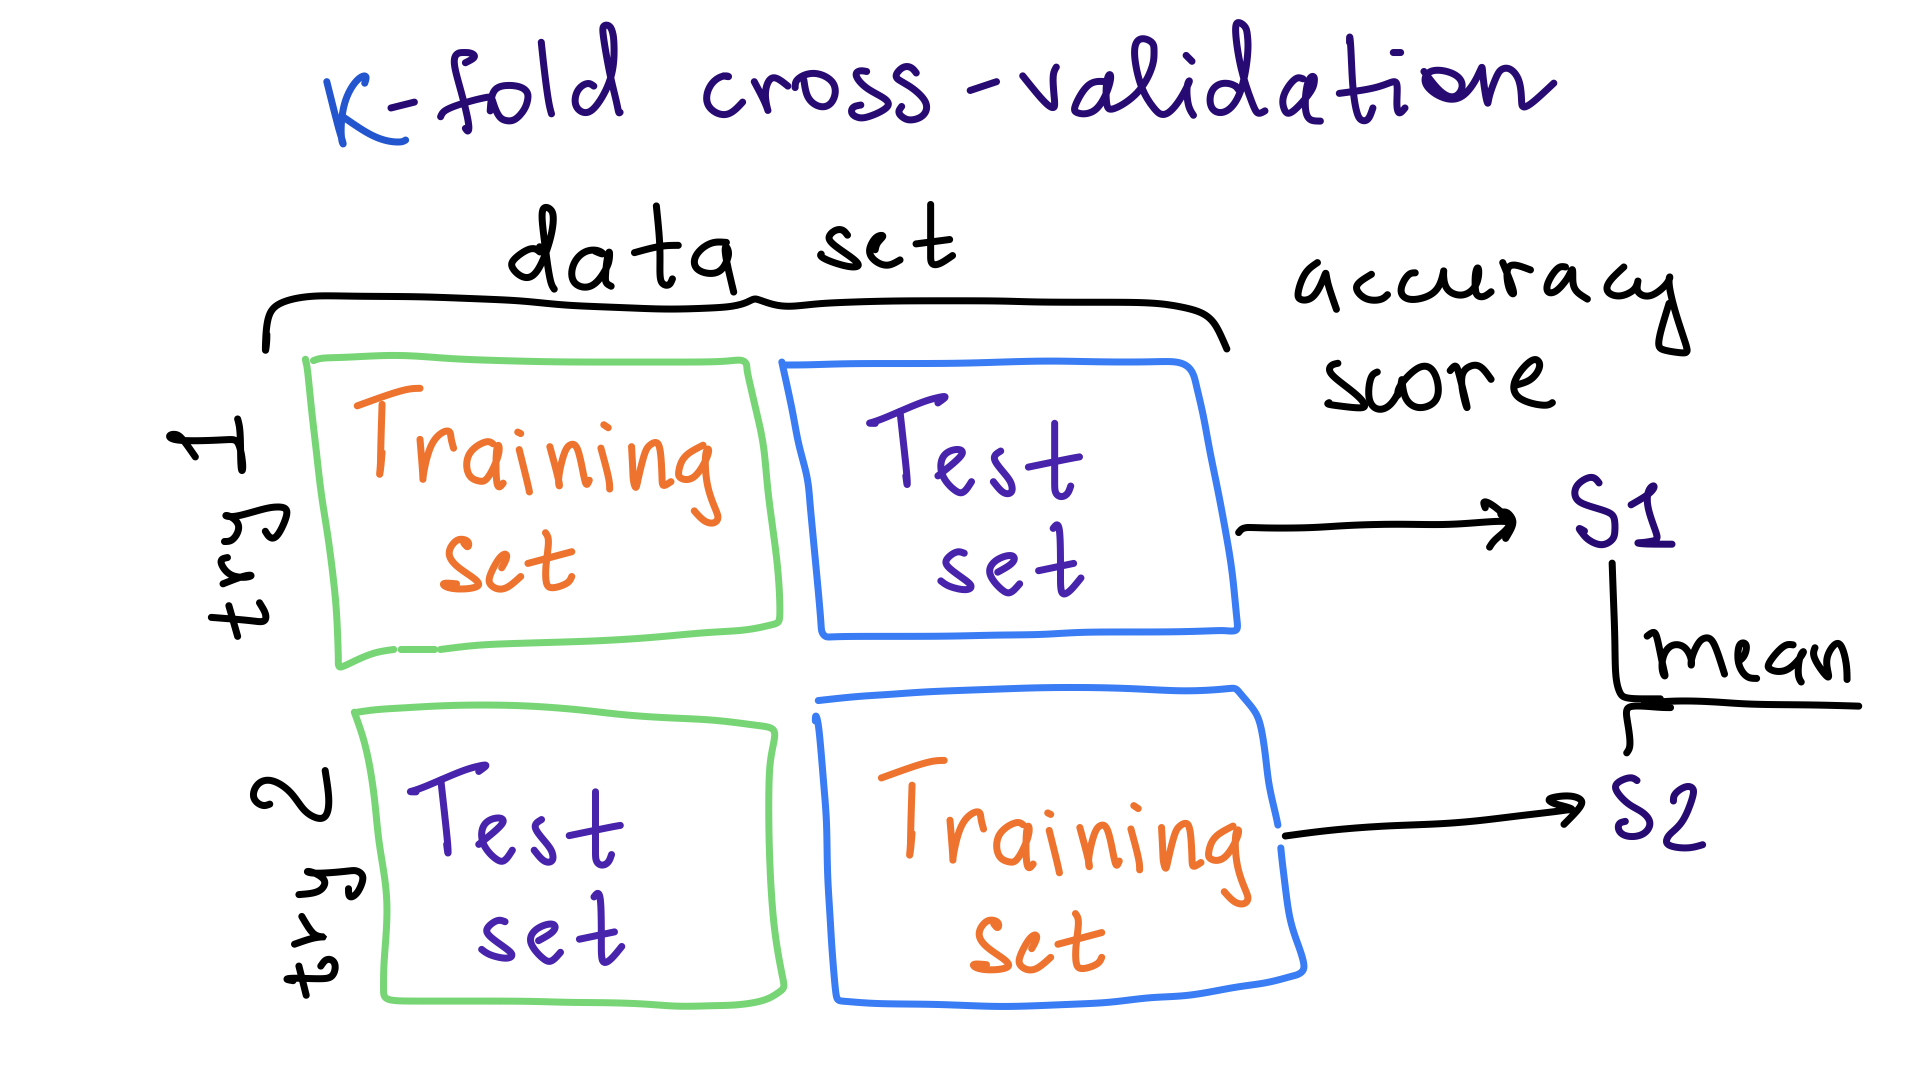

## Classification algorithms

In [3]:
X = crds_pca[:int(0.75 * len(crds_pca))]
y = y_true_cls[:int(0.75 * len(y_true_cls))]

X_val = crds_pca[int(0.75 * len(crds_pca)):]
y_val = y_true_cls[int(0.75 * len(y_true_cls)):]

### Gaussian Naive Bayes

In [4]:
# Create a linear regression model
model = GaussianNB()

# Shuffle data and apply 5-fold cross-validation technique
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='precision')

print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.30 precision with a standard deviation of 0.05


In [5]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [6]:
# prediction
model.fit(X, y)
y_pred = model.predict(X_val)

In [7]:
# coefficient of determination (R²)
r_sq = model.score(X, y)
print(f"Coefficient of determination: {round(r_sq, 3)}")

Coefficient of determination: 0.597


Text(113.92222222222219, 0.5, 'predicted label')

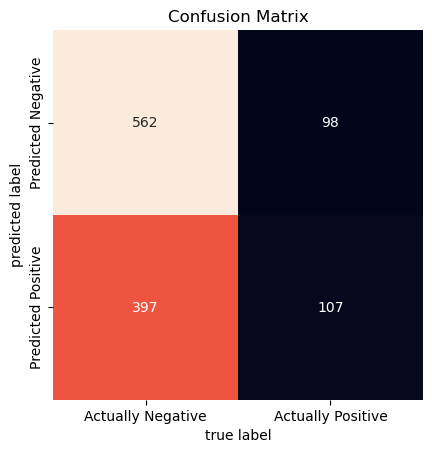

In [8]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [9]:
print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', round(precision_score(y_val, y_pred), 2), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

Recall: 0.52 
Precision 0.21 
Accuracy 0.57


### C-Support Vector Classification

In [10]:
model = SVC(kernel='linear', C=1, random_state=0)

scoring = ['recall', 'precision']
scores = cross_validate(model, X, y, scoring=scoring)

print("%0.2f precision with a standard deviation of %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))

0.32 precision with a standard deviation of 0.04
0.40 recall with a standard deviation of 0.07


Recall: 0.51 
Precision 0.2988505747126437 
Accuracy 0.7


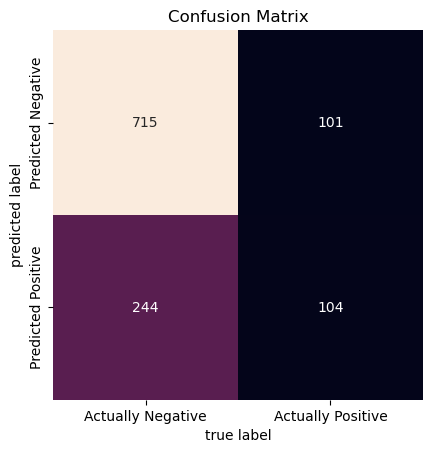

In [11]:
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

### Decision Tree Classifier

In [12]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='precision')

print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.34 precision with a standard deviation of 0.04


Recall: 0.25 
Precision 0.21428571428571427 
Accuracy 0.71


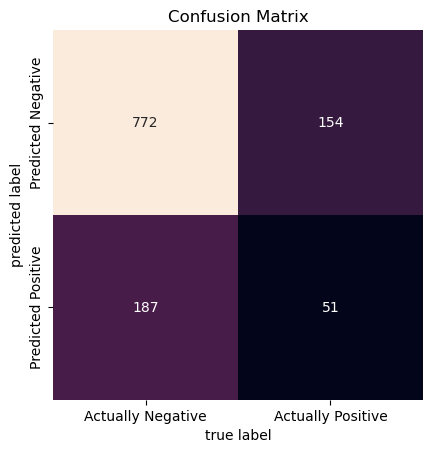

In [13]:
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

### Pipeline

Pipeline of transforms with a final estimator. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

In [14]:
pipe = Pipeline([
#          ('gaussian', GaussianNB()),
#          ('dtree', DecisionTreeClassifier()),
#          ('svc', SVC()),
         ('knn', KNeighborsClassifier())
])
pipe.fit(X, y)
print(f"Coefficient of determination: {round(pipe.score(X, y), 3)}")

Coefficient of determination: 0.893


### Grid Search Cross-Validation

It runs through all the different parameters that is fed into the parameter grid and produces the best combination of parameters, based on a scoring metric of your choice.

In [15]:
pipe = Pipeline([
#     ('nb', GaussianNB()),
#     ('dtc', DecisionTreeClassifier()),
#     ('svc', SVC()),
    ('knn', KNeighborsClassifier())
                    ])

params = [{
#     'dtc__max_depth':[3, 10]
#     'svc__kernel':('linear', 'rbf'), 
#     'svc__C':[1, 10],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'cosine'],
    'knn__leaf_size': [15, 20]
          }]

gs = GridSearchCV(pipe,
                  param_grid=params,
                  scoring='recall',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

The best parametrs: {'knn__leaf_size': 15, 'knn__metric': 'cosine', 'knn__n_neighbors': 3, 'knn__weights': 'distance'} 
Score: 0.997


Recall: 0.31 
Precision 0.525 
Accuracy 0.83


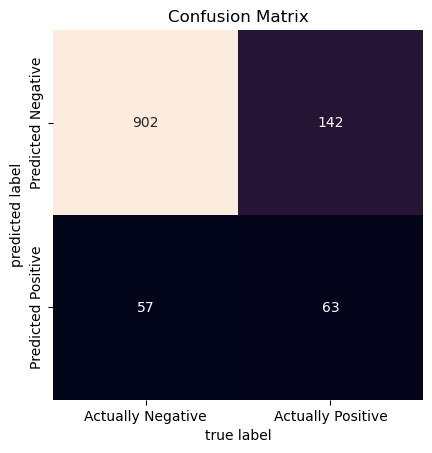

In [16]:
model = KNeighborsClassifier(leaf_size=15, n_neighbors=3, weights='uniform')
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

## Regresion algorithms

In [30]:
X = crds_pca[:int(0.75 * len(crds_pca))]
X_val = crds_pca[int(0.75 * len(crds_pca)):]

y = y_true_reg[:int(0.75 * len(y_true_reg))]
y_val = y_true_reg[int(0.75 * len(y_true_reg)):]

In [18]:
# pipe = Pipeline([
#     ('LR', LinearRegression()),
#     ('dtr', DecisionTreeRegressor()),
#     ('svr', SVR()),
#     ('knr', KNeighborsRegressor())
#                     ])

# params = [{
#     'svr__kernel':('linear', 'rbf'), 
#     'svr__C':[1, 10],
#     'knr__n_neighbors': [3, 5, 7, 9],
#     'knr__weights': ['uniform', 'distance'],
#     'knr__metric': ['euclidean', 'cosine'],
#     'knr__leaf_size': [15, 20]
#           }]

# gs = GridSearchCV(pipe,
#                   param_grid=params,
#                   scoring='recall',
#                   cv=5)

# gs.fit(X, y)
# print('The best parametrs:', gs.best_params_,
#       '\nScore:', round(gs.score(X, y), 3))

In [32]:
pipe = Pipeline([
    ('LR', LinearRegression())
                    ])

gs = GridSearchCV(pipe,
                  param_grid=[{}],
                  scoring='roc_auc',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-te

ValueError: continuous format is not supported

In [20]:
pipe = Pipeline([
    ('dtr', DecisionTreeRegressor())
                    ])

params = [{}]

gs = GridSearchCV(pipe,
                  param_grid=params,
                  scoring='roc_auc',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Users/meddwl/miniconda3/envs/rd22/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-te

ValueError: continuous format is not supported

In [ ]:
pipe = Pipeline([
    ('svr', SVR())
                    ])

params = [{
    'svr__kernel':('linear', 'rbf')
}]

gs = GridSearchCV(pipe,
                  param_grid=params,
                  scoring='roc_auc',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

In [ ]:
pipe = Pipeline([
    ('knr', KNeighborsRegressor())
                    ])

params = [{
    'knr__n_neighbors': [3, 5, 7, 9],
    'knr__metric': ['euclidean', 'cosine'],
    'knr__leaf_size': [15, 20]
          }]

gs = GridSearchCV(pipe,
                  param_grid=params,
                  scoring='roc_auc',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

In [ ]:
model = DecisionTreeRegressor()
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

In [ ]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_val[:, 0], X_val[:, 1], X_val[:, 2], c=y_pred)
plt.show()

## References:

- Supervised learning https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

- Cross Validation https://scikit-learn.org/stable/modules/cross_validation.html#

- Automated Machine Learning (AutoML) https://machinelearningmastery.com/automl-libraries-for-python/

## Conclusion

1. We learned about different model validation algorithms
2. We evaluated and compared the prediction accuracy of several classification algorithms on the data
3. We evaluated and compared the prediction accuracy of several regrassion algorithms on the data

What approaches do you remember the most? Follow the link and create the smartest model to discovery new Cytochrome P450 3A4 inhibitors

Challenge!
[The place for your personal growth](https://github.com/meddwl/skillbox/blob/main/QSAR/QSAR.ipynb)